In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

C:\Users\Asch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Let's create a mapping from fruit label value to fruit name

In [3]:
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#### This step makes results easiet to interpret

In [4]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### colored scatter matrix

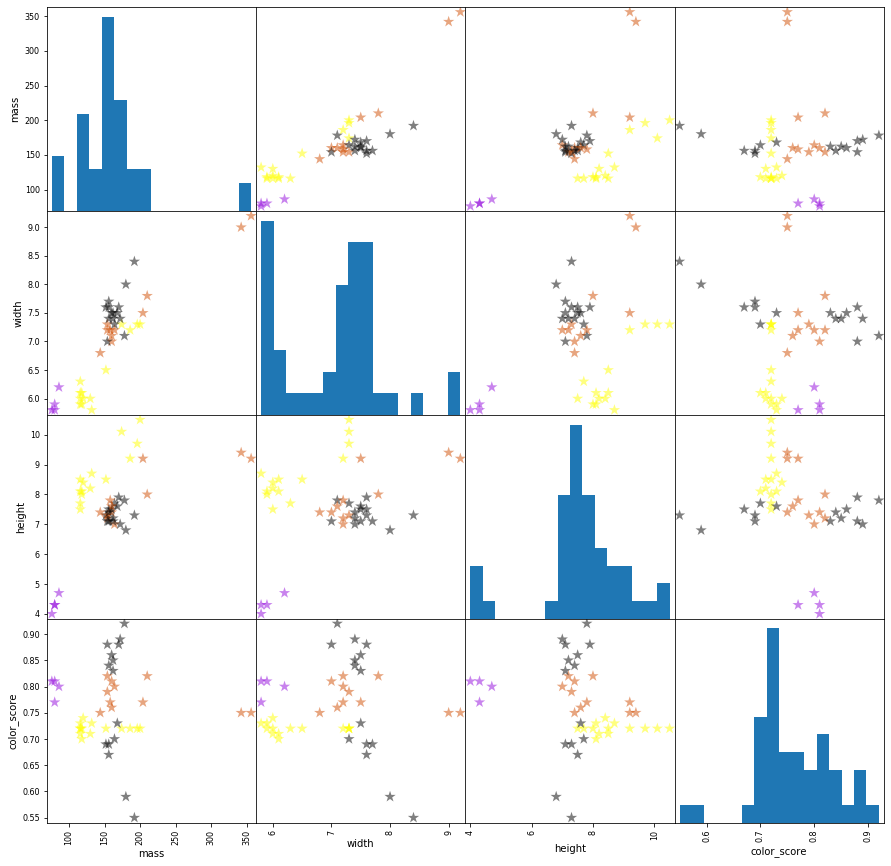

In [12]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker = '*', s=140, hist_kwds={'bins':16}, 
                         figsize=(15,15), cmap = cmap)

#### Beyond 2D

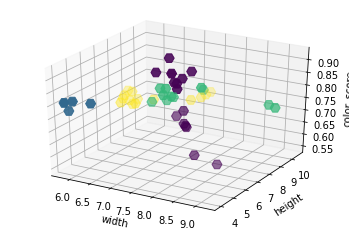

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'H', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [18]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### KNN Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### Classifier accuracy estimation on future data using test data

In [20]:
knn.score(X_test, y_test)

0.5333333333333333

#### Passing observation to our classifier in param 
fruit with 190g, width 8 cm, height 7 cm 

In [24]:
fruit_prediction = knn.predict([[190, 8, 7]])
fruit_prediction[0]

1

In [25]:
look_up_fruit_name[fruit_prediction[0]]

'apple'

#### plotting the decision boundries of our classifier
Visualizing results for each k can help in choosing the K

C:\Users\Asch\Desktop\GIT\projects from git\Machine-Learning-with-Python-master\Machine-Learning-with-Python-master\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\Asch\Desktop\GIT\projects from git\Machine-Learning-with-Python-master\Machine-Learning-with-Python-master\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


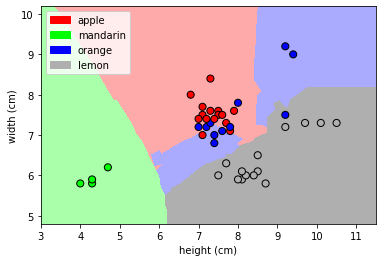

In [26]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 6, 'uniform')

#### Varying `k` and visualize accuracy variation

([<matplotlib.axis.XTick at 0x1a1df55ff60>,
 <a list of 5 Text xticklabel objects>)

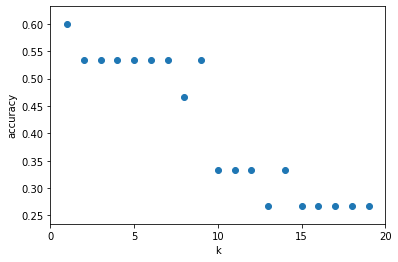

In [27]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

####  Varying `train/test split proportion` and visualize accuracy variation

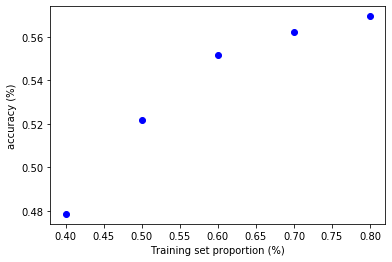

In [28]:
t = [0.8, 0.7, 0.6, 0.5, 0.4]
knn = KNeighborsClassifier(n_neighbors = 6)
plt.figure()
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy (%)');

## Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [33]:
error_rate = []

# Will take some time
for i in range(1,24):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

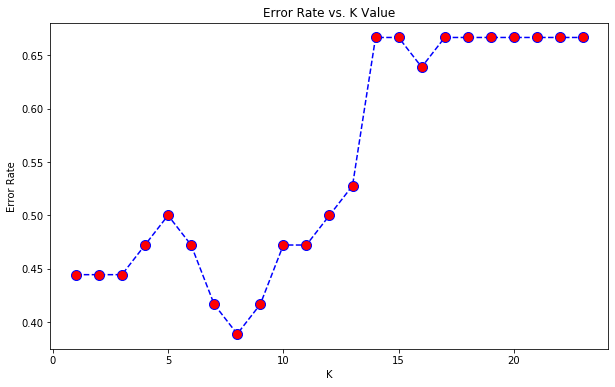

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,24),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')